$$\frac{\partial G}{\partial n_i} = \mu_i = \mu^0_i + RT \log a_i$$

$$G^0(X) = \sum_i X_i \mu^0_i$$

$$N = 6$$

$$G_{XS} = \sum_{i=0}^{N-1} \sum_{j>i}^{N-1} X_i X_j W_{ij}$$


$$ S_{\rm conf} = - R\left( \sum_i^{\rm X-site} {X_{X,i} \log X_{X,i}} + \sum_j^{\rm Y-site} {X_{Y,j} \log X_{Y,j}} \right) $$ 


$$G(X) = G^0(X) + G_{XS}(X) - T S_{\rm conf}$$

* Consider the actual observed reaction in an experiment, where the garnet (and potentially other coexisting minerals) have intermediate compositions and are coexisting with melt
* Mass balance for a single solid phase yields the following chemical equation

$$ \phi_p = \sum_{k=1}^\textrm{Liq Comp} \nu_{p,k} c_{p,k}$$

$$ \sum_{\phi} \sum_{\phi_p} X_{\phi_p} \phi_p  $$

$$ \phi_X = \sum_p^\textrm{Sol Endmems} \phi_p$$

* Let's write the reaction as a melting reaction, with all solid phases on the left and melt on the right


* Ideally, at equilibrium, the Gibbs energy of the reaction is equal to zero, but in reality, there will be some nonzero energy change (or affinity) of the reaction. 
* The sign is chosen such that a positive affinity favors formation of the the garnet

$$\mathcal{A}_R = -\Delta G_R = n_L \bar{G}_{\rm L}(X_{\rm L}) - \sum_{\phi} n_\phi \bar{G}_{\phi}(X_\phi) -n_{\rm grn} G_{\rm grn}(X_{\rm grn})$$

$$\mathcal{A}_{R,c} = -\Delta \mu_c$$

is the chemical potential 

In [ ]:
# $$ \sum_p \nu_p^{\rm grn} c_p^{\rm grn} = \sum_p^{\textrm{liquid}} \nu_p^L c_p^L - \sum_k^{\textrm{xtal}} \nu_k^{s} c_k^s  + $$


In [106]:
import numpy as np
import sympy as sym


In [107]:
sym.init_printing()

In [108]:
R = sym.symbols('R')
Teq, Peq = sym.symbols('T_{eq} P_{eq}')
X_i, mu_i = sym.symbols('X_i, mu_i')
Teq, Peq, X_i, mu_i



In [111]:
expr = X_i
X_i


In [112]:
expr = expr + X_i**2
expr

In [114]:
expr = expr + X_i**3
expr

In [171]:
X = sym.MatrixSymbol('X',1,6)
NX = X.shape[-1]

for i, Xi in enumerate(X):
    for j in range(i+1,NX):
        Xj = X[j]
        print(Xi*Xj)

X[0, 0]*X[0, 1]
X[0, 0]*X[0, 2]
X[0, 0]*X[0, 3]
X[0, 0]*X[0, 4]
X[0, 0]*X[0, 5]
X[0, 1]*X[0, 2]
X[0, 1]*X[0, 3]
X[0, 1]*X[0, 4]
X[0, 1]*X[0, 5]
X[0, 2]*X[0, 3]
X[0, 2]*X[0, 4]
X[0, 2]*X[0, 5]
X[0, 3]*X[0, 4]
X[0, 3]*X[0, 5]
X[0, 4]*X[0, 5]


In [169]:
X[3:5]

IndexError: 

In [140]:
# X = sym.symbols('X:6')
nmol_grt = sym.symbols('N:6')



In [141]:
nmol_grt

In [163]:
NX = X.shape[-1]
NW = NX*(NX-1)/2
W = sym.symbols('W:'+str(int(NW)))
W

In [181]:
W = sym.MatrixSymbol('W',1,NW)
W

In [182]:
# W = sym.MatrixSymbol

In [183]:

G_xs = 0
ind = 0 
for i, Xi in enumerate(X):
    for j in range(i+1,NX):
        Xj = X[j]
        G_xs += Xi*Xj*W[ind]
        ind +=1
        
G_xs

In [164]:
G_xs = 0
ind = 0 
for i, Xi in enumerate(X):
    for Xj in X[i+1:]:
        G_xs += Xi*Xj*W[ind]
        ind +=1
    
G_xs
    

IndexError: 

In [185]:

sym.Matrix([G_xs]).jacobian(W)

In [184]:
sym.Matrix([G_xs]).jacobian(X)

In [ ]:

G_xs = sym.Function('G_{xs}')(X)
sym.Equality(G_xs,sym.summation(X))

In [58]:
i = sym.symbols('i')
sym.summation(X[:],(i,0,5))

In [103]:
X = sym.MatrixSymbol('X',1,6)
sum(X)

In [100]:
sym.Matrix?

In [97]:
(sym.diag(X.T*X)).doit()

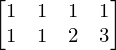

In [187]:
M = sym.Matrix(((1, 1, 1, 1), (1, 1, 2, 3)))
M

In [188]:
system = A, b = M[:, :-1], M[:, -1]

In [207]:
xsyms = sym.symbols('x:3')
xsyms
sym.linsolve(system, xsyms)

In [208]:
xmat = sym.MatrixSymbols('x',1,3)
sym.linsolve(system, xmat)

AttributeError: module 'sympy' has no attribute 'MatrixSymbols'